# Tensorflow Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 1. Tensor Shape

### 1-1. Vector. 1-Tensor

In [39]:
a = [312]
a

[312]

In [40]:
a = tf.constant([312])
a, tf.shape(a)

(<tf.Tensor 'Const_17:0' shape=(1,) dtype=int32>,
 <tf.Tensor 'Shape_14:0' shape=(1,) dtype=int32>)

In [41]:
b = [1., 2., 3.]
b

[1.0, 2.0, 3.0]

In [42]:
b = tf.constant([1., 2., 3.])
b, tf.shape(b)

(<tf.Tensor 'Const_18:0' shape=(3,) dtype=float32>,
 <tf.Tensor 'Shape_15:0' shape=(1,) dtype=int32>)

### 1-2. Matrix. 2-Tensor

In [15]:
c = [  [1,2,3]
     , [4,5,6]]
c

[[1, 2, 3], [4, 5, 6]]

In [32]:
c = tf.constant([  [1,2,3]
                 , [4,5,6]])
c, tf.shape(c)

(<tf.Tensor 'Const_10:0' shape=(2, 3) dtype=int32>,
 <tf.Tensor 'Shape_10:0' shape=(2,) dtype=int32>)

### 1-3. 3-Tensor

In [24]:
d = [  [[1],[2],[3]]
     , [[4],[5],[6]]
     , [[7],[8],[9]]]
d

[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]

In [33]:
d = tf.constant([  [[1],[2],[3]]
                 , [[4],[5],[6]]
                 , [[7],[8],[9]]])
d, tf.shape(d)

(<tf.Tensor 'Const_11:0' shape=(3, 3, 1) dtype=int32>,
 <tf.Tensor 'Shape_11:0' shape=(3,) dtype=int32>)

### 1-4. 4-Tensor

In [34]:
e = tf.constant(## axis = 0 
                    [## axis = 1
                     [## aixs = 2
                       [## axis = 3
                        [1,2,3,4]
                       ,[5,6,7,8]
                       ,[9,10,11,12]
                       ],
                        [
                         [13,14,15,16]
                        ,[17,18,19,20]
                        ,[21,22,23,24]
                       ]
                      ]
                ])
e, tf.shape(e)

(<tf.Tensor 'Const_12:0' shape=(1, 2, 3, 4) dtype=int32>,
 <tf.Tensor 'Shape_12:0' shape=(4,) dtype=int32>)

### 1-5. tf.matmul

matrix multiplication

In [52]:
m1 = tf.constant([[1,2], [3,4]])
m2 = tf.constant([[1], [2]])
m1, m2

(<tf.Tensor 'Const_21:0' shape=(2, 2) dtype=int32>,
 <tf.Tensor 'Const_22:0' shape=(2, 1) dtype=int32>)

In [53]:
m12 = tf.matmul(m1, m2)
m12

<tf.Tensor 'MatMul_5:0' shape=(2, 1) dtype=int32>

In [54]:
## tensorflow 실행
sess = tf.Session()

print(sess.run(m1))
print(sess.run(m2))
print(sess.run(m12))

[[1 2]
 [3 4]]
[[1]
 [2]]
[[ 5]
 [11]]


### 주의

일반 행렬 곱

In [56]:
print(sess.run(m1 * m2))

[[1 2]
 [6 8]]


Broadcasting. Tensor shape이 다르더라도 합의 연산이 가능

In [57]:
print(sess.run(m1 + m2))

[[2 3]
 [5 6]]


------------------------------------------------------------------
### 1-6. axis 연산

In [62]:
a = tf.constant([[1.,2.], [3.,4.]])
a, a.shape

(<tf.Tensor 'Const_24:0' shape=(2, 2) dtype=float32>,
 TensorShape([Dimension(2), Dimension(2)]))

In [63]:
print(sess.run(tf.reduce_mean(a)))

2.5


In [64]:
## reduce_mean axis 연산

print(sess.run(tf.reduce_mean(a, axis =  0)))
print(sess.run(tf.reduce_mean(a, axis =  1)))
print(sess.run(tf.reduce_mean(a, axis = -1))) ## -1 : 가장 안쪽에 있는 axis

[ 2.  3.]
[ 1.5  3.5]
[ 1.5  3.5]


In [67]:
## argmax axis 연산
b = tf.constant([[1.,2.,5.], [3.,0.,7.]])

print(sess.run(tf.argmax(b, axis =  0)))
print(sess.run(tf.argmax(b, axis =  1)))
print(sess.run(tf.argmax(b, axis = -1))) 

[1 0 1]
[2 2]
[2 2]


### 1-7. Reshape

In [69]:
c = np.array([[[1., 2., 5.]
               ,[3., 0., 7.]]
              ,[[6., 5., 9.]
                ,[4., 8., 3.]]
             ])
c, c.shape

(array([[[ 1.,  2.,  5.],
         [ 3.,  0.,  7.]],
 
        [[ 6.,  5.,  9.],
         [ 4.,  8.,  3.]]]), (2, 2, 3))

In [70]:
tf.reshape(c, shape = [-1, 3])

<tf.Tensor 'Reshape:0' shape=(4, 3) dtype=float64>

In [71]:
print(sess.run(tf.reshape(c, shape = [-1, 3])))

[[ 1.  2.  5.]
 [ 3.  0.  7.]
 [ 6.  5.  9.]
 [ 4.  8.  3.]]


In [73]:
tf.reshape(c, shape = [-1, 1, 3])

<tf.Tensor 'Reshape_4:0' shape=(4, 1, 3) dtype=float64>

In [74]:
print(sess.run(tf.reshape(c, shape = [-1, 1, 3])))

[[[ 1.  2.  5.]]

 [[ 3.  0.  7.]]

 [[ 6.  5.  9.]]

 [[ 4.  8.  3.]]]


-------------------------------------------------------------------------
## 3. 상수 & 변수

### tf.placeholder

In [75]:
## 상수 타입 정의
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
Y = a + b

## tensorflow 실행
sess = tf.Session()

## 실행 시점에 상수 데이터 정의
print(sess.run(Y, feed_dict = {a:8,     b:2.3}))
print(sess.run(Y, feed_dict = {a:[2,3], b:[5,7]}))

10.3
[  7.  10.]


### tf.Variable

In [76]:
## 변수 정의
a = tf.Variable(tf.random_normal([784,200]), name = "Var")
b = tf.Variable(tf.zeros([200]))

print(a), print(b)

Tensor("Var_1/read:0", shape=(784, 200), dtype=float32)
Tensor("Variable_1/read:0", shape=(200,), dtype=float32)


(None, None)

-------------------------------------------------------------
## 4. Linear Regression 
## 4-1) Single Variable 

## A. X, Y 데이터를 정의한 경우 (상수 정의 전)

$ H(x) = Wx + b $

### (1) Build Graph

In [77]:
## x, y 정의
x_train = [1,2,3]
y_train = [3,6,9]

## weight, bias 정의
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

## model 정의
model = x_train * W + b

## loss function 정의(cost 최소화)
cost = tf.reduce_mean(tf.square(model - y_train))

## Gradient Descent (Gradient optimization)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### (2) Run Graph

In [78]:
## Session option (Launch Graph in a session)
sess = tf.Session()

## 변수 초기화 (반드시 실행 필요!!)
sess.run(tf.global_variables_initializer())

### (3) Update Graph

In [8]:
## Fit the line
for step in range(3001):
    sess.run(optimizer)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 4.5805 [ 1.93201768] [ 0.18145368]
20 0.0799366 [ 2.69240499] [ 0.48534253]
40 0.0356063 [ 2.77448511] [ 0.49228135]
60 0.0320029 [ 2.79152274] [ 0.47197852]
80 0.0290624 [ 2.80193377] [ 0.45006692]
100 0.0263949 [ 2.81130052] [ 0.42894086]
120 0.0239722 [ 2.82017446] [ 0.40878451]
140 0.021772 [ 2.82862592] [ 0.38957325]
160 0.0197737 [ 2.83668017] [ 0.37126479]
180 0.0179587 [ 2.84435558] [ 0.35381654]
200 0.0163104 [ 2.85167003] [ 0.33718851]
220 0.0148134 [ 2.85864139] [ 0.32134193]
240 0.0134537 [ 2.86528444] [ 0.30624005]
260 0.0122189 [ 2.87161565] [ 0.29184791]
280 0.0110974 [ 2.87764931] [ 0.27813223]
300 0.0100789 [ 2.88339949] [ 0.26506078]
320 0.00915379 [ 2.8888793] [ 0.2526038]
340 0.00831359 [ 2.89410138] [ 0.24073236]
360 0.00755056 [ 2.89907813] [ 0.22941896]
380 0.00685752 [ 2.90382099] [ 0.21863715]
400 0.00622815 [ 2.90834117] [ 0.20836203]
420 0.00565648 [ 2.91264868] [ 0.19856986]
440 0.00513731 [ 2.91675377] [ 0.18923782]
460 0.0046658 [ 2.92066646] [ 0.1803445

-------------------------------------------------------------
## 4-1) Single Variable
## B. X, Y 데이터를 tf.placeholder로 정의한 경우 (상수 정의)

0 1.12552 [ 0.6470257] [-0.19217764]
20 0.0103287 [ 0.97805756] [-0.04482184]
40 0.000206191 [ 1.00902975] [-0.02954428]
60 0.000104082 [ 1.01145637] [-0.02690169]
80 9.37742e-05 [ 1.01118934] [-0.02551796]
100 8.51608e-05 [ 1.0106895] [-0.02430728]
120 7.73453e-05 [ 1.01018941] [-0.02316385]
140 7.02445e-05 [ 1.00971079] [-0.02207511]
160 6.37966e-05 [ 1.00925446] [-0.02103763]
180 5.79419e-05 [ 1.00881958] [-0.02004892]
200 5.26238e-05 [ 1.00840509] [-0.01910673]
220 4.77944e-05 [ 1.00801015] [-0.01820882]
240 4.34078e-05 [ 1.00763369] [-0.01735308]
260 3.94232e-05 [ 1.00727499] [-0.01653757]
280 3.58046e-05 [ 1.00693309] [-0.01576038]
300 3.25187e-05 [ 1.00660717] [-0.01501974]
320 2.95343e-05 [ 1.00629675] [-0.01431387]
340 2.68232e-05 [ 1.00600076] [-0.0136412]
360 2.43612e-05 [ 1.00571871] [-0.01300009]
380 2.21259e-05 [ 1.00545013] [-0.01238916]
400 2.00947e-05 [ 1.00519395] [-0.01180695]
420 1.82506e-05 [ 1.00494981] [-0.01125208]
440 1.65754e-05 [ 1.00471723] [-0.01072327]
460

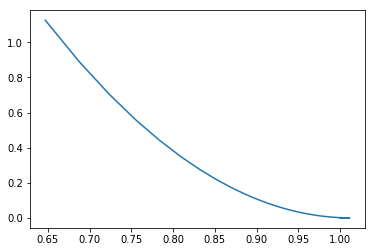

In [4]:
# Build Graph
## X, Y 정의 (tf.placeholder)
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

## weight, bias 정의
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

## model 정의
model = X *W  + b

## loss function 정의(cost 최소화)
cost = tf.reduce_mean(tf.square(model - Y))

## Gradient Descent (Gradient optimization)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

#-------------------------------------------------------------------------------------
# Run Graph
## Session option (Launch Graph in a session)
sess = tf.Session()

## 변수 초기화 (반드시 실행 필요!!)
sess.run(tf.global_variables_initializer())

#-------------------------------------------------------------------------------------
# Update Graph
## result set
cost_list = []
W_list    = []

## Fit the line
for step in range(3001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, optimizer], feed_dict = {X: [1,2,3], Y : [1,2,3]})
    cost_list.append(cost_val)
    W_list.append(W_val)
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

plt.plot(W_list, cost_list)        
plt.show()

----------------------------------------------------------------------------------------
## 4-2) Multi Variables

## A. 변수를 각각 정의한 경우

$ H(x_{1}, x_{2}, x_{3}) = x_{1} * w_{1} + x_{2} * w_{2} + x_{3} * w_{3} + b $

### (1) Build Graph

In [19]:
## x, y data 정의
x1_data = [23.,   35.,  48.,  62.,  83.]
x2_data = [38.,   46.,  59.,  74.,  95.]
x3_data = [35.,   42.,  46.,  53.,  60.]
y_data  = [110., 146., 198., 223., 257.]

## x1, x2, x3, y 정의
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y  = tf.placeholder(tf.float32)

## w1, w2, w3, b 정의
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b  = tf.Variable(tf.random_normal([1]))

## model 정의
model = x1 * w1 + x2 * w2 + x3 * w3 + b

## loss function 정의(cost 최소화)
cost = tf.reduce_mean(tf.square(model - Y))

## Gradient Descent (Gradient optimization)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

### (2~3) Run & Update Graph

In [20]:
## Session option (Launch Graph in a session)
sess = tf.Session()

## 변수 초기화 (반드시 실행 필요!!)
sess.run(tf.global_variables_initializer())

## Fit the line
for step in range(3001):
    cost_val, model_val, _ = sess.run([cost, model, optimizer]
                                      , feed_dict = {x1:x1_data, x2:x2_data, x3:x3_data, Y:y_data})
    if step % 20 == 0:
        print(step, "Cost: ", cost_val, "| Prediction: ", model_val)

0 Cost:  41418.3 | Prediction:  [ 14.09157467   8.425807    -3.3481915  -12.62978458 -30.93039894]
20 Cost:  166.366 | Prediction:  [ 127.67745209  153.81390381  178.93356323  213.42396545  255.25283813]
40 Cost:  155.689 | Prediction:  [ 129.14404297  155.80194092  181.56510925  216.77156067  259.64071655]
60 Cost:  154.026 | Prediction:  [ 128.96514893  155.68304443  181.55371094  216.84077454  259.87667847]
80 Cost:  152.441 | Prediction:  [ 128.76667786  155.53678894  181.50466919  216.86126709  260.04736328]
100 Cost:  150.928 | Prediction:  [ 128.57243347  155.39369202  181.45629883  216.88056946  260.21304321]
120 Cost:  149.485 | Prediction:  [ 128.38270569  155.25411987  181.40914917  216.89945984  260.37475586]
140 Cost:  148.107 | Prediction:  [ 128.19734192  155.11799622  181.36317444  216.91790771  260.53256226]
160 Cost:  146.792 | Prediction:  [ 128.01623535  154.98521423  181.31832886  216.93589783  260.68649292]
180 Cost:  145.537 | Prediction:  [ 127.83933258  154.855

----------------------------------------------------------------------------------------------
## 4-2) Multi Variables

## B. X, Y matrix 곱으로 정의한 경우

0 Cost:  41161.2 | W:  [[-0.34247261]
 [ 1.31231213]
 [ 0.72936344]
 [ 0.76242685]
 [-0.94039047]] | Prediction:  [[-17.31612778]
 [-14.72752762]
 [  7.95966005]]
20 Cost:  3365.83 | W:  [[ 0.07205261]
 [ 1.77315784]
 [ 1.1986208 ]
 [ 1.27859759]
 [-0.40336505]] | Prediction:  [[ 166.50390625]
 [ 210.66339111]
 [ 174.87539673]]
40 Cost:  3107.1 | W:  [[ 0.21372584]
 [ 1.88791263]
 [ 1.23851395]
 [ 1.26505113]
 [-0.53206909]] | Prediction:  [[ 164.19706726]
 [ 210.48612976]
 [ 178.08183289]]
60 Cost:  2868.37 | W:  [[ 0.34960961]
 [ 1.99804127]
 [ 1.27666438]
 [ 1.25180054]
 [-0.65604067]] | Prediction:  [[ 161.89390564]
 [ 210.2097168 ]
 [ 181.08514404]]
80 Cost:  2648.1 | W:  [[ 0.48005763]
 [ 2.10388637]
 [ 1.31334126]
 [ 1.23908293]
 [-0.77515161]] | Prediction:  [[ 159.6816864 ]
 [ 209.94393921]
 [ 183.97009277]]
100 Cost:  2444.85 | W:  [[ 0.60528433]
 [ 2.20561767]
 [ 1.34860241]
 [ 1.22687721]
 [-0.88959306]] | Prediction:  [[ 157.55685425]
 [ 209.68844604]
 [ 186.74143982]]
120

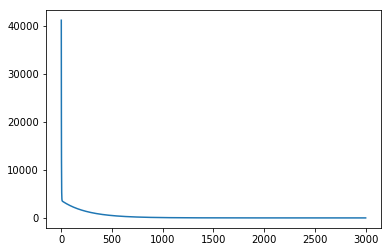

In [80]:
# Build Graph
## x, y data 정의
x_data = [ [23.,   35.,  48.,  62.,  83.]
          ,[38.,   46.,  59.,  74.,  95.]
          ,[35.,   42.,  46.,  53.,  60.]]
y_data = [[110.], [198.], [257.]]

## X, Y 정의
X = tf.placeholder(tf.float32, shape = [None, 5])
Y = tf.placeholder(tf.float32, shape = [None, 1])

## W, b 정의
W = tf.Variable(tf.random_normal([5,1]))
b = tf.Variable(tf.random_normal([1]))

## model 정의 >> matrix 곱으로 표현
# model = x1 * w1 + x2 * w2 + x3 * w3 + b 
model = tf.matmul(X, W) + b

## loss function 정의(cost 최소화)
cost = tf.reduce_mean(tf.square(model - Y))

## Gradient Descent (Gradient optimization)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)


#-------------------------------------------------------------------------------------
# Run Graph
## Session option (Launch Graph in a session)
sess = tf.Session()

## 변수 초기화 (반드시 실행 필요!!)
sess.run(tf.global_variables_initializer())


#-------------------------------------------------------------------------------------
# Update Graph
cost_list = []

## Fit the line
for step in range(3001):
    cost_val, W_val, model_val, _ = sess.run([cost, W, model, optimizer]
                                      , feed_dict = {X:x_data, Y:y_data})
    cost_list.append(cost_val)
    
    if step % 20 == 0:
        print(step, "Cost: ", cost_val, "| W: ", W_val, "| Prediction: ", model_val)
        
plt.plot(cost_list)        
plt.show()        

------------------------------------------------------------------------------------
## 4-3) Softmax Classification

실습데이터; https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

### (1) Build Graph

In [15]:
## Seeding
tf.set_random_seed(6100)

## data loading
data = np.loadtxt('D:/2_Edu/5_Deep_Learning_Tensor/Practice/zoo.txt', delimiter = ',', dtype = np.float32)

## data split
x_data = data[:, 0:-1]
y_data = data[:, [-1]]

print(x_data, y_data)
print(x_data.shape, y_data.shape)

[[ 1.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  1. ...,  1.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  1.  0.  0.]] [[ 0.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 3.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 3.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 1.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 5.]
 [ 4.]
 [ 4.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 3.]
 [ 5.]
 [ 5.]
 [ 1.]
 [ 5.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 6.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 6.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 6.]
 [ 3.]
 [ 1.]
 [ 0.]
 [ 6.]
 [ 3.]
 [ 1.]
 [ 5.]
 [ 4.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 5.]
 [ 0.]
 [ 6.]
 [ 1.]]
(101, 16) (101, 1)


In [17]:
## Classification Number 정의 >> 1 ~ 7
class_num = 7 

## X, Y 정의
X = tf.placeholder(shape = [None, 16], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1],  dtype = tf.int32); print(Y)

##-- Y >> one hot encoding (0, 1)
Y_one_hot = tf.one_hot(Y, class_num)                   ; print(Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, class_num])     ; print(Y_one_hot)

Tensor("Placeholder_5:0", shape=(?, 1), dtype=int32)
Tensor("one_hot_2:0", shape=(?, 1, 7), dtype=float32)
Tensor("Reshape_11:0", shape=(?, 7), dtype=float32)


In [18]:
## W, b 정의
W = tf.Variable(tf.random_normal([16, class_num]))
b = tf.Variable(tf.random_normal([class_num]))

## model 정의
model      = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(model)

## loss function 정의(cost 최소화) >> softmax
##-- **_with_logits: Classification 처리 없는 상태에서 계산 (softmax 전단계)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model, labels = Y_one_hot))

## Gradient Descent (Gradient optimization)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

## Classification Accuracy
prediction         = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy           = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### (2~3) Run & Update Graph

In [23]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    ## training
    for step in range(5000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        
        ## training log
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
                
    # predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for pred_val, y_val in zip(pred, y_data.flatten()):
        print("Pred: {} | Prediction: {} | True Y: {} | [{}]".format(y_val, pred_val, int(y_val), pred_val == int(y_val)))

Step:     0	Loss: 4.712	Acc: 43.56%
Step:   100	Loss: 4.709	Acc: 43.56%
Step:   200	Loss: 4.707	Acc: 43.56%
Step:   300	Loss: 4.704	Acc: 43.56%
Step:   400	Loss: 4.701	Acc: 43.56%
Step:   500	Loss: 4.698	Acc: 43.56%
Step:   600	Loss: 4.695	Acc: 43.56%
Step:   700	Loss: 4.693	Acc: 43.56%
Step:   800	Loss: 4.690	Acc: 43.56%
Step:   900	Loss: 4.687	Acc: 43.56%
Step:  1000	Loss: 4.684	Acc: 43.56%
Step:  1100	Loss: 4.682	Acc: 43.56%
Step:  1200	Loss: 4.679	Acc: 43.56%
Step:  1300	Loss: 4.676	Acc: 43.56%
Step:  1400	Loss: 4.673	Acc: 43.56%
Step:  1500	Loss: 4.670	Acc: 43.56%
Step:  1600	Loss: 4.668	Acc: 43.56%
Step:  1700	Loss: 4.665	Acc: 43.56%
Step:  1800	Loss: 4.662	Acc: 43.56%
Step:  1900	Loss: 4.659	Acc: 43.56%
Step:  2000	Loss: 4.657	Acc: 43.56%
Step:  2100	Loss: 4.654	Acc: 43.56%
Step:  2200	Loss: 4.651	Acc: 43.56%
Step:  2300	Loss: 4.648	Acc: 43.56%
Step:  2400	Loss: 4.646	Acc: 43.56%
Step:  2500	Loss: 4.643	Acc: 43.56%
Step:  2600	Loss: 4.640	Acc: 43.56%
Step:  2700	Loss: 4.638	Acc:

--------------------------------------------------------------------------------

*End of Code*